**Script Statistik Labor 1 Aufgabe 2**

**Aufgabe 1: Einlesen der Daten in Python**

In [1]:
import numpy as np
import pandas as pd
from scipy.optimize import  curve_fit
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import math

In [2]:
dataframe = pd.read_csv('sr_aufg_2_35.txt',
                        sep = r"\s+",
                        decimal=",",
                        header = None, names = ["Jahr","Einwohner in Millionen"],)

In [3]:
dataframe

,Jahr,Einwohner in Millionen
0,1790,3.929214
1,1800,5.308483
2,1820,9.638453
3,1830,12.866020
4,1840,17.069453
5,1850,23.191876
6,1860,31.443321
7,1870,39.818449
8,1880,50.189209
9,1890,62.979766


In [4]:
x=dataframe['Jahr']
x=x.to_numpy()
x=x.reshape(-1,1)
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

**Aufgabe 2: Streudiagramm**

Text(0.5, 0, 'Jahreszahlen')

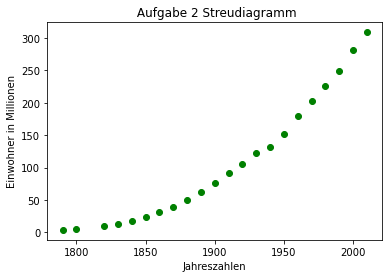

In [5]:
plt.scatter(dataframe['Jahr'], dataframe['Einwohner in Millionen'], marker='o', color='green')
plt.title(" Aufgabe 2 Streudiagramm")
plt.ylabel('Einwohner in Millionen')
plt.xlabel('Jahreszahlen')

**Polynom 1.Grades**

In [6]:
PolyNr1_features = PolynomialFeatures(degree = 1)


PloyNr1_pop = PolyNr1_features.fit_transform(x_scaled)
PolyNr1_pop_model = LinearRegression()
PolyNr1_pop_model.fit(PloyNr1_pop, dataframe['Einwohner in Millionen'])

PolyNr1_coeff = PolyNr1_pop_model.intercept_, PolyNr1_pop_model.coef_[1]
print('Die Gleichung der linearen Funktion: \ny = %4.2f + %4.4f * x' %PolyNr1_coeff)

r_sqr_1 = PolyNr1_pop_model.score(PloyNr1_pop, dataframe['Einwohner in Millionen'])
print('Das Bestimmtheitsmaß der linearen Funktion ist: %1.4f' %r_sqr_1)

Die Gleichung der linearen Funktion: 
y = 108.44 + 89.9874 * x
Das Bestimmtheitsmaß der linearen Funktion ist: 0.9193


**Polynom 2.Grades**

In [7]:
PolyNr2_features = PolynomialFeatures(degree = 2)


PolyNr2_pop = PolyNr2_features.fit_transform(x_scaled)
PolyNr2_pop_model = LinearRegression()
PolyNr2_pop_model.fit(PolyNr2_pop, dataframe['Einwohner in Millionen'])

PolyNr2_coeff = PolyNr2_pop_model.intercept_, PolyNr2_pop_model.coef_[1], PolyNr2_pop_model.coef_[2]
print('Die Gleichung des Polynoms Grad 2 lautet: \ny = %4.2f + %4.4f * x + %4.4f * x^2' %PolyNr2_coeff)

r_sqr_2 = PolyNr2_pop_model.score(PolyNr2_pop, dataframe['Einwohner in Millionen'])
print('Das Bestimmtheitsmaß der quadratischen Regression ist: %1.4f' %r_sqr_2)

Die Gleichung des Polynoms Grad 2 lautet: 
y = 79.96 + 91.9297 * x + 28.4808 * x^2
Das Bestimmtheitsmaß der quadratischen Regression ist: 0.9991


**Aufgabe 4&5: Optimale Regressionskurve einzeichnen**

Es kommt auf das Bestimmtheitsmaß an welches bei dem Polynom des 2. Grades sehr hoch ist.

Der Unterschied der Funktionen höherer grade ist nur nach der vierten Nachkommastelle zu bemerken, also sind die Unterschiede sehr gering aber der Aufwand wird höher. Desshalb ist der Polynom des 2. Grades perfekt geeignet da wir da einen genauen wert bei weniger Aufwand erziehlen.

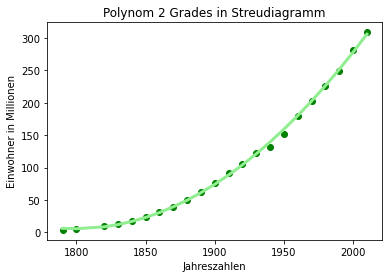

In [8]:
PolyNr2_pop_predict=PolyNr2_pop_model.predict(PolyNr2_pop)
plt.scatter(dataframe['Jahr'], dataframe['Einwohner in Millionen'], marker='o', color='green')
plt.title("Polynom 2 Grades in Streudiagramm")
plt.ylabel('Einwohner in Millionen')
plt.xlabel('Jahreszahlen')
plt.plot(x, PolyNr2_pop_predict, color='lightgreen', linewidth=3)

**Polynom 3.Grades**

In [9]:
PolyNr3_features = PolynomialFeatures(degree = 3)


PolyNr3_pop = PolyNr3_features.fit_transform(x_scaled)
PolyNr3_pop_model = LinearRegression()
PolyNr3_pop_model.fit(PolyNr3_pop, dataframe['Einwohner in Millionen'])

PolyNr3_coeff = PolyNr3_pop_model.intercept_, PolyNr3_pop_model.coef_[1], PolyNr3_pop_model.coef_[2], PolyNr3_pop_model.coef_[3]
print('Die Gleichung des Polynoms Grad 3 lautet: \ny = %4.2f + %4.4f*x + %4.4f*x^2 + %4.4f*x^3' %PolyNr3_coeff)

r_sqr_3 = PolyNr3_pop_model.score(PolyNr3_pop, dataframe['Einwohner in Millionen'])
print('Das Bestimmtheitsmaß der Regression mit dem Polynom vom Grad 3 ist: \n%1.4f' %r_sqr_3)

Die Gleichung des Polynoms Grad 3 lautet: 
y = 79.76 + 88.8612*x + 28.7872*x^2 + 1.6513*x^3
Das Bestimmtheitsmaß der Regression mit dem Polynom vom Grad 3 ist: 
0.9993


**Polynom 4.Grades**

In [10]:
PolyNr4_features = PolynomialFeatures(degree = 4)


PolyNr4_pop = PolyNr4_features.fit_transform(x_scaled)
PolyNr4_pop_model = LinearRegression()
PolyNr4_pop_model.fit(PolyNr4_pop, dataframe['Einwohner in Millionen'])

PolyNr4_coeff = PolyNr4_pop_model.intercept_, PolyNr4_pop_model.coef_[1], PolyNr4_pop_model.coef_[2], PolyNr4_pop_model.coef_[3],PolyNr4_pop_model.coef_[4]
print('Die Gleichung des Polynoms Grad 4 lautet: \ny = %4.2f + %4.4f*x + %4.4f*x^2 + %4.4f*x^3 + %4.4f*x^4' %PolyNr4_coeff)

r_sqr_4 = PolyNr4_pop_model.score(PolyNr4_pop, dataframe['Einwohner in Millionen'])
print('Das Bestimmtheitsmaß der Regression mit dem Polynom vom Grad 4 ist: \n%1.4f' %r_sqr_4)

Die Gleichung des Polynoms Grad 4 lautet: 
y = 80.62 + 88.5442*x + 25.9886*x^2 + 1.9182*x^3 + 1.0463*x^4
Das Bestimmtheitsmaß der Regression mit dem Polynom vom Grad 4 ist: 
0.9993


**Polynom 5.Grades**

In [11]:
PolyNr5_features = PolynomialFeatures(degree = 5)


PolyNr5_pop = PolyNr5_features.fit_transform(x_scaled)
PolyNr5_pop_model = LinearRegression()
PolyNr5_pop_model.fit(PolyNr5_pop, dataframe['Einwohner in Millionen'])

PolyNr5_coeff = PolyNr5_pop_model.intercept_, PolyNr5_pop_model.coef_[1], PolyNr5_pop_model.coef_[2], PolyNr5_pop_model.coef_[3], PolyNr5_pop_model.coef_[4], PolyNr5_pop_model.coef_[5]
print('Die Gleichung des Polynoms Grad 5 lautet: \ny = %4.2f + %4.4f*x + %4.4f*x^2 + %4.4f*x^3 + %4.4f*x^4 + %4.4f*x^5' %PolyNr5_coeff)

r_sqr_5 = PolyNr5_pop_model.score(PolyNr5_pop, dataframe['Einwohner in Millionen'])
print('Das Bestimmtheitsmaß der Regression mit dem Polynom vom Grad 5 ist: \n%1.4f' %r_sqr_5)

Die Gleichung des Polynoms Grad 5 lautet: 
y = 80.63 + 88.6151*x + 25.9739*x^2 + 1.8081*x^3 + 1.0547*x^4 + 0.0322*x^5
Das Bestimmtheitsmaß der Regression mit dem Polynom vom Grad 5 ist: 
0.9993


**Polynom 6.Grades**

In [12]:
PolyNr6_features = PolynomialFeatures(degree = 6)


PolyNr6_pop = PolyNr6_features.fit_transform(x_scaled)
PolyNr6_pop_model = LinearRegression()
PolyNr6_pop_model.fit(PolyNr6_pop, dataframe['Einwohner in Millionen'])

PolyNr6_coeff = PolyNr6_pop_model.intercept_, PolyNr6_pop_model.coef_[1], PolyNr6_pop_model.coef_[2], PolyNr6_pop_model.coef_[3], PolyNr6_pop_model.coef_[4], PolyNr6_pop_model.coef_[5], PolyNr6_pop_model.coef_[6]
print('Die Gleichung des Polynoms Grad 6 lautet: \ny = %4.2f + %4.4f*x + %4.4f*x^2 + %4.4f*x^3 + %4.4f*x^4 + %4.4f*x^5 + %4.4f*x^6' %PolyNr6_coeff)

r_sqr_6 = PolyNr6_pop_model.score(PolyNr6_pop, dataframe['Einwohner in Millionen'])
print('Das Bestimmtheitsmaß der Regression mit dem Polynom vom Grad 6 ist: \n%1.4f' %r_sqr_6)

Die Gleichung des Polynoms Grad 6 lautet: 
y = 81.75 + 87.9566*x + 17.9615*x^2 + 3.1502*x^3 + 9.1556*x^4 + -0.5079*x^5 + -1.9687*x^6
Das Bestimmtheitsmaß der Regression mit dem Polynom vom Grad 6 ist: 
0.9995


**Exponentialfunktion**

In [13]:
def f1(x,b,a): return a*np.exp(b*x)

coefsexp,covexp=curve_fit(f1, dataframe['Jahr'], dataframe['Einwohner in Millionen'], p0=(0.01,0.1))
print('Die Gleichung der Exponentialfunktion: \ny = %4.2f + %4.4f * x'% (coefsexp[0],coefsexp[1]))


residuals = dataframe['Einwohner in Millionen'].to_numpy().reshape(-1,1)-f1(x, *coefsexp)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((dataframe['Einwohner in Millionen']-np.mean(dataframe['Einwohner in Millionen']))**2)

r_exp = 1 - (ss_res / ss_tot)
print('Das Bestimmtheitsmaß der Exponentialfunktion: %1.4f' %r_exp)

Die Gleichung der Exponentialfunktion: 
y = 0.01 + 0.0000 * x
Das Bestimmtheitsmaß der Exponentialfunktion: 0.9861


**Logarithmusfunktion**

In [14]:
def f(x,b,a): return a*np.log(x)-b

coefslog,covlog=curve_fit(f, dataframe['Jahr'], dataframe['Einwohner in Millionen'])
print('Die Gleichung der Logarithmusfunktion: \ny = %4.2f + %4.4f * x'% (coefslog[0],coefslog[1]))


residuals = dataframe['Einwohner in Millionen'].to_numpy().reshape(-1,1)-f(x, *coefslog)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((dataframe['Einwohner in Millionen']-np.mean(dataframe['Einwohner in Millionen']))**2)

r_log = 1 - (ss_res / ss_tot)
print('Das Bestimmtheitsmaß der Logarithmusfunktion: %1.4f' %r_log)

Die Gleichung der Logarithmusfunktion: 
y = 19684.46 + 2621.1667 * x
Das Bestimmtheitsmaß der Logarithmusfunktion: 0.9105


**Aufgabe 6: Prognose 2020 mit Polynom 2.Grades**

In [15]:
PolyNr2_features = PolynomialFeatures(degree = 2)
PolyNr2_pop = PolyNr2_features.fit_transform(x)
PolyNr2_pop_model = LinearRegression()
PolyNr2_pop_model.fit(PolyNr2_pop, dataframe['Einwohner in Millionen'])
PolyNr2_coeff_prog = PolyNr2_pop_model.intercept_, PolyNr2_pop_model.coef_[1], PolyNr2_pop_model.coef_[2]

In [16]:
year=2020
forecast=PolyNr2_coeff_prog[0]+PolyNr2_coeff_prog[1]*year+PolyNr2_coeff_prog[2]*(year*year)
print(f'--> Prognose für das Jahr {year}: {forecast:.2f} Millionen Einwohner in den USA <--')

--> Prognose für das Jahr 2020: 334.86 Millionen Einwohner in den USA <--


**Tabelle zur darstellung des Bestimmtheitsmaßes der verschiedenen Polynomen**

In [17]:
info_table = [
        ["Polynom 1. Grades", '%1.4f' %r_sqr_1,'%4.4f' %PolyNr1_coeff[0], '%4.4f' %PolyNr1_coeff[1],"-","-","-","-","-"],
        ["Polynom 2. Grades",'%4.4f' %r_sqr_2, '%4.4f' %PolyNr2_coeff[0],'%4.4f' %PolyNr2_coeff[1],'%4.4f' %PolyNr2_coeff[2],"-","-","-","-"],
        ["Polynom 3. Grades",'%4.4f' %r_sqr_3, '%4.4f' %PolyNr3_coeff[0],'%4.4f' %PolyNr3_coeff[1],'%4.4f' %PolyNr3_coeff[2],'%4.4f' %PolyNr3_coeff[3],"-","-","-"],
        ["Polynom 4. Grades",'%4.4f' %r_sqr_4, '%4.4f' %PolyNr4_coeff[0],'%4.4f' %PolyNr4_coeff[1],'%4.4f' %PolyNr4_coeff[2],'%4.4f' %PolyNr4_coeff[3],'%4.4f' %PolyNr4_coeff[4],"-","-"],
        ["Polynom 5. Grades",'%4.4f' %r_sqr_5, '%4.4f' %PolyNr5_coeff[0],'%4.4f' %PolyNr5_coeff[1],'%4.4f' %PolyNr5_coeff[2],'%4.4f' %PolyNr5_coeff[3],'%4.4f' %PolyNr5_coeff[4],'%4.4f' %PolyNr5_coeff[5],"-"],
        ["Polynom 6. Grades",'%4.4f' %r_sqr_6,  '%4.4f' %PolyNr6_coeff[0],'%4.4f' %PolyNr6_coeff[1],'%4.4f' %PolyNr6_coeff[2],'%4.4f' %PolyNr6_coeff[3],'%4.4f' %PolyNr6_coeff[4],'%4.4f' %PolyNr6_coeff[5],'%4.4f' %PolyNr6_coeff[6]],
        ["Exponentialfunktion", '%4.4f' %r_exp, '%4.4f' %coefsexp[0],'%4.4f' %coefsexp[1],"-","-","-","-","-"],
        ["Logarithmusfunktion",'%4.4f' %r_log,  '%4.4f' %coefslog[0],'%4.4f' %coefslog[1],"-","-","-","-","-"],
]

info_table = pd.DataFrame(info_table, columns=["Type","Bestimmtheistmaß","Y-Achsenabschnitt","1.Koeffizient",
                                            "2.Koeffizient","3.Koeffizient","4.Koeffizient",
                                           "5.Koeffizient","6.Koeffizient"])

info_table

,Type,Bestimmtheistmaß,Y-Achsenabschnitt,1.Koeffizient,2.Koeffizient,3.Koeffizient,4.Koeffizient,5.Koeffizient,6.Koeffizient
0,Polynom 1. Grades,0.9193,108.4384,89.9874,-,-,-,-,-
1,Polynom 2. Grades,0.9991,79.9577,91.9297,28.4808,-,-,-,-
2,Polynom 3. Grades,0.9993,79.7638,88.8612,28.7872,1.6513,-,-,-
3,Polynom 4. Grades,0.9993,80.6231,88.5442,25.9886,1.9182,1.0463,-,-
4,Polynom 5. Grades,0.9993,80.6261,88.6151,25.9739,1.8081,1.0547,0.0322,-
5,Polynom 6. Grades,0.9995,81.7548,87.9566,17.9615,3.1502,9.1556,-0.5079,-1.9687
6,Exponentialfunktion,0.9861,0.0135,0.0000,-,-,-,-,-
7,Logarithmusfunktion,0.9105,19684.4553,2621.1667,-,-,-,-,-
